

# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



# import sys
# import statistics
import math

In [7]:

data = pd.read_csv('/home/mono/gitHub/Ironweek4/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head(4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [8]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
data.columns = cols

In [9]:
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize




## 1. Get the numerical variables from our dataset.



In [10]:
num = data.select_dtypes(include = np. number)
num.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935




## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
    * normal: months_since_policy_inception, total_claim_amount
    * exponential: customer_lifetime_value, monthly_premium_auto, number_of_open_complaints, number_of_policies,



In [11]:
def df_displot(df):
    sns.set(rc={'figure.figsize':(8,6)})

    for i, col in enumerate(df):
        plt.figure(i)
        sns.displot(df[col])
        plt.show()

<Figure size 576x432 with 0 Axes>

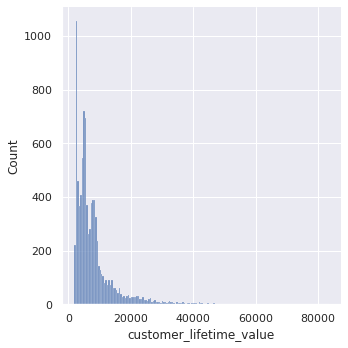

<Figure size 576x432 with 0 Axes>

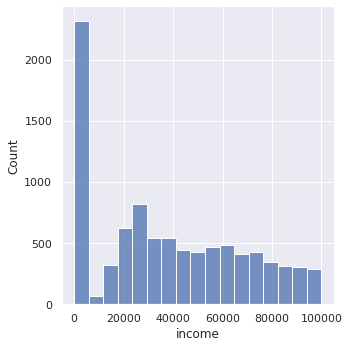

<Figure size 576x432 with 0 Axes>

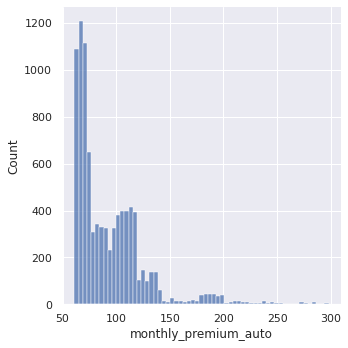

<Figure size 576x432 with 0 Axes>

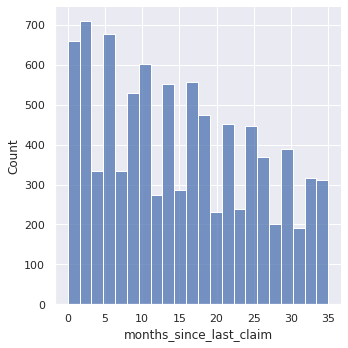

<Figure size 576x432 with 0 Axes>

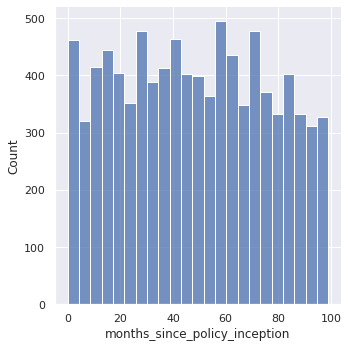

<Figure size 576x432 with 0 Axes>

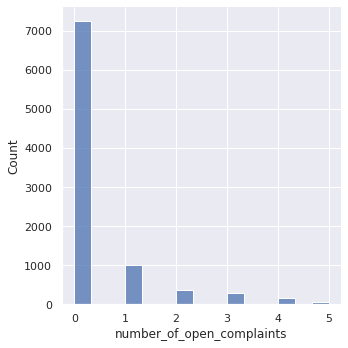

<Figure size 576x432 with 0 Axes>

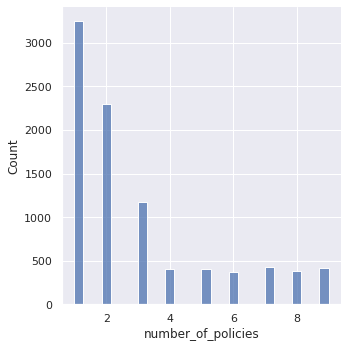

<Figure size 576x432 with 0 Axes>

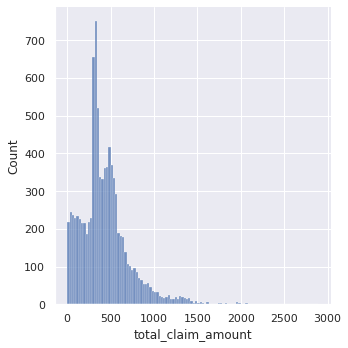

In [9]:
df_displot(num)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')



## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

When a selection of three features, **total_claim_amount, income and customer_lifetime_value** are transformed with ***Log_transformation*** the first looks normalized while the others are exponential. 
When these features are transformed with ***Box_Cox*** the first looks normalized but it is plotted to the left, while the second is plotted to the center presenting a curve that tend to be normalized and the thrid is plotted to the left with a kind of normalized curve.   

In [12]:
#code fom Himanshu
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


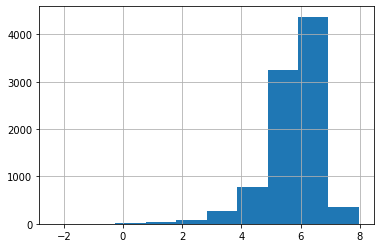

In [19]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, num['total_claim_amount'])).hist()
plt.show()


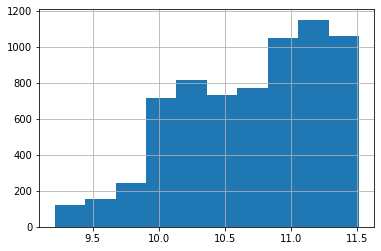

In [20]:
pd.Series(map(log_transfom_clean_, num['income'])).hist()


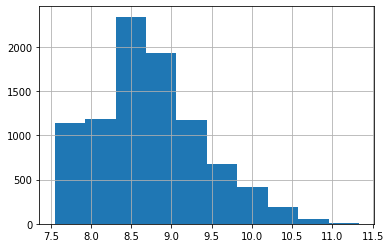

In [22]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, num['customer_lifetime_value'])).hist()
plt.show()


### Box_Cox Transformation

In [26]:
from scipy import stats

num['tca_box'] = np.where(num['total_claim_amount']<=0,0,num['total_claim_amount'])
mean = np.sum(num['tca_box'])/len(num[num['tca_box']>0])
num['tca_box'] = num['tca_box'].replace(0,mean)

xt, lmbda = stats.boxcox(num['tca_box'])

data['tca_box'] = xt

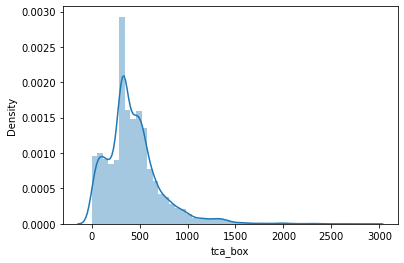

In [36]:
sns.distplot(num['tca_box'])
plt.show()

In [29]:


num['income_box'] = np.where(num['income']<=0,0,num['income'])
mean = np.sum(num['income_box'])/len(num[num['income_box']>0])
num['income_box'] = num['income_box'].replace(0,mean)

xt, lmbda = stats.boxcox(num['income_box'])

data['income_box'] = xt

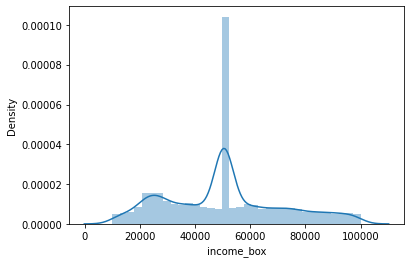

In [30]:
sns.distplot(num['income_box'])
plt.show()

In [33]:


num['clv_box'] = np.where(num['customer_lifetime_value']<=0,0,num['customer_lifetime_value'])
mean = np.sum(num['clv_box'])/len(num[num['clv_box']>0])
num['clv_box'] = num['clv_box'].replace(0,mean)

xt, lmbda = stats.boxcox(num['clv_box'])

data['clv_box'] = xt

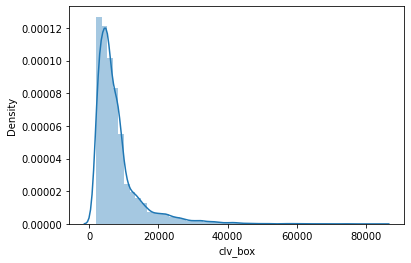

In [34]:
sns.distplot(num['clv_box'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

<Figure size 576x432 with 0 Axes>

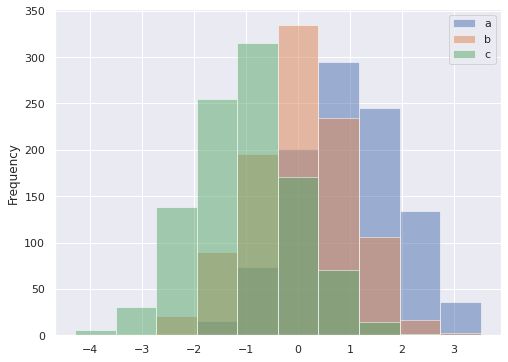

In [19]:
# option to apply many plots
df4 = pd.DataFrame(
    {
         "a": np.random.randn(1000) + 1,
         "b": np.random.randn(1000),
         "c": np.random.randn(1000) - 1,
     },
columns=["a", "b", "c"],
)


plt.figure();
df4.plot.hist(alpha=0.5)

### LAB-46 Finisehd-------------- 